Problem statement.

Build a recommender system by using cosine simillarties score.

## Importing Libraries and Datasets:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation, jaccard
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

In [2]:
books = pd.read_csv("book.csv", encoding='Latin1')
books

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


## Renaming the columns:

In [3]:
books.rename(columns={'User.ID':'user_id','Book.Title':'title',
                      'Book.Rating':'rating'}, inplace=True)

In [4]:
books

,Unnamed: 0,user_id,title,rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [5]:
books = books.drop('Unnamed: 0',axis=1)

In [6]:
books

,user_id,title,rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


## Data Exploration:

In [7]:
print('Number of Unique Users are', format(len(books['user_id'].unique())))

Number of Unique Users are 2182


In [8]:
print('Nimber of Unique Books are', format(len(books['title'].unique())))

Nimber of Unique Books are 9659


In [9]:
books['rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: rating, dtype: int64

### Checking for datatypes:

In [10]:
books['user_id'].unique()

array([276726, 276729, 276736, ..., 162113, 162121, 162129], dtype=int64)

In [11]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  10000 non-null  int64 
 1   title    10000 non-null  object
 2   rating   10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [12]:
books.describe()

,user_id,rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


### Checking for null values:

In [13]:
books.isnull().sum()

user_id    0
title      0
rating     0
dtype: int64

In [14]:
books.isnull().any()

user_id    False
title      False
rating     False
dtype: bool

### Checking for duplicate values and deleting duplicate values:

In [15]:
books.duplicated().sum()

2

In [16]:
books[books.duplicated()]

,user_id,title,rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


## Data Visualization:

### Using countplot to plot ratings of books

In [17]:
palette = sns.color_palette("RdBu", 10)

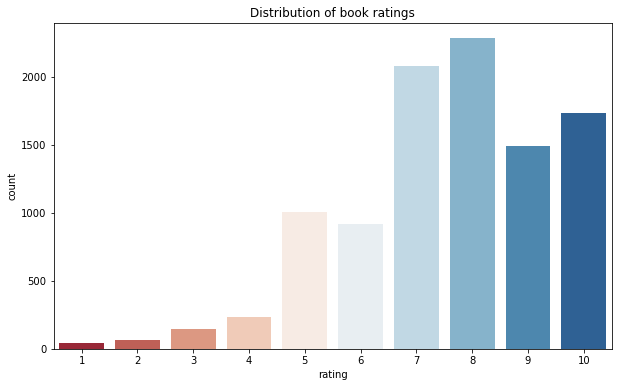

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='rating', data=books, palette=palette)
ax.set_title('Distribution of book ratings')
plt.show()

In [19]:
ratings = pd.DataFrame(books.groupby('title')['rating'].mean())
ratings

,rating
title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0
...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0
"\Well, there's your problem\: Cartoons",9.0
iI Paradiso Degli Orchi,7.0


In [20]:
ratings['num of ratings'] = pd.DataFrame(books.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


<AxesSubplot:>

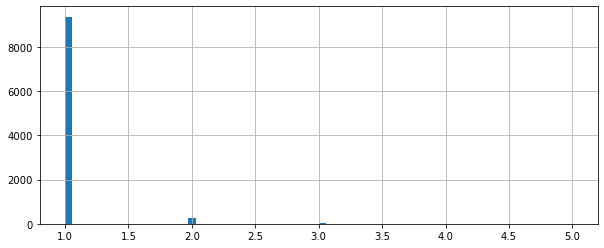

In [21]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

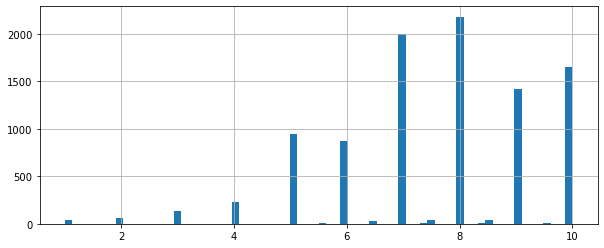

In [22]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

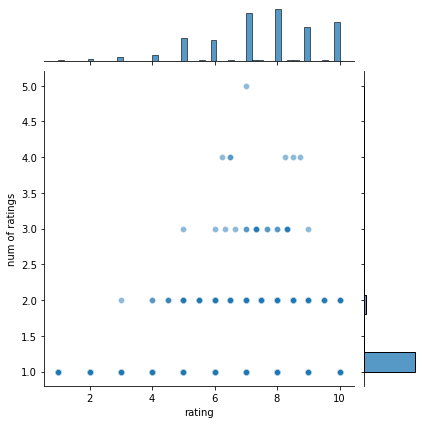

In [23]:
sns.jointplot(x='rating', y='num of ratings', data=ratings, alpha=0.5)

Text(0.5, 1.0, 'Rating Frequency')

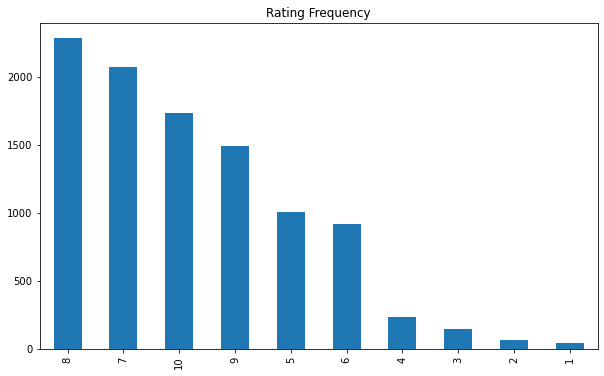

In [24]:
plt.figure(figsize=(10,6))
books['rating'].value_counts().plot(kind='bar')
plt.title('Rating Frequency')

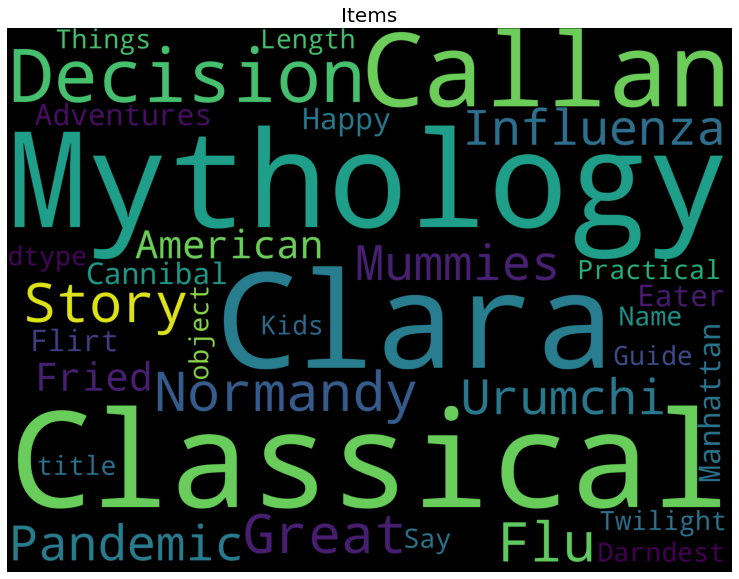

In [40]:
from wordcloud import WordCloud
plt.rcParams['figure.figsize'] = (15,10)
wordcloud = WordCloud(background_color='black', width=2000, height=1500, max_words=121).generate(str(books.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items', fontsize=20)
plt.show()

# Creating Pivot Table:
##### Input NaN with Zero

In [26]:
books_df = books.pivot_table(index='user_id', columns='title', values='rating').fillna(0)
books_df

title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
user_id,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [27]:
ratings.sort_values('num of ratings', ascending=False).head(10)

,rating,num of ratings
title,,
Fahrenheit 451,7.000000,5
Ender's Game (Ender Wiggins Saga (Paperback)),6.250000,4
Stardust,8.500000,4
Vanished,6.500000,4
Charlie and the Chocolate Factory,6.500000,4
"The Subtle Knife (His Dark Materials, Book 2)",8.750000,4
"The Amber Spyglass (His Dark Materials, Book 3)",8.250000,4
"The Golden Compass (His Dark Materials, Book 1)",8.333333,3
Pet Sematary,7.666667,3


## Calculating Cosine Similarity between Users:

In [28]:
user_sim = 1 - pairwise_distances(books_df.values, metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Store the results in a dataframe:

In [29]:
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Set the index and column names to user ids:

In [30]:
user_sim_df.index = books.user_id.unique()
user_sim_df.columns = books.user_id.unique()

In [31]:
user_sim_df.iloc[:5,:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


#### Nullifying diagonal values:

In [32]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5,0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


#### Checking for most similar users:

In [33]:
user_sim_df.idxmax(axis=1)

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

#### Extract the books with user_id:

In [34]:
books[(books['user_id']==162109) | (books['user_id']==276736)]

,user_id,title,rating
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
9988,162109,The Flower in the Skull,10


In [35]:
books[(books['user_id']==276744) | (books['user_id']==276736)]

,user_id,title,rating
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276744,The Kitchen God's Wife,7


In [36]:
user1 = books[(books['user_id']==276736)]
user2 = books[(books['user_id']==276744)]

In [37]:
user1['title']

3    Flu: The Story of the Great Influenza Pandemic...
Name: title, dtype: object

In [38]:
user2['title']

5    The Kitchen God's Wife
Name: title, dtype: object

In [39]:
pd.merge(user1, user2, on='title', how = 'outer')

,user_id_x,title,rating_x,user_id_y,rating_y
0,276736.0,Flu: The Story of the Great Influenza Pandemic...,8.0,NaN,NaN
1,NaN,The Kitchen God's Wife,NaN,276744.0,7.0
